In [1]:
#Importing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats

# Task 1: Become familiar with the dataset
## int64
+ CRIM - Per capita crime rate by town

## float 64

+ ZN - Proportion of residential land zoned for lots over 25,000 sq.ft.
+ INDUS - proportion of non-retail business acres per town.
+ CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
+ NOX - Nitric oxides concentration (parts per 10 million)
+ RM - Average number of rooms per dwelling
+ AGE - Proportion of owner-occupied units built prior to 1940
+ DIS - Weighted distances to five Boston employment centres
+ RAD - Index of accessibility to radial highways
+ TAX - Full-value property-tax rate per 10000
+ PTRATIO - Pupil-teacher ratio by town
+ LSTAT - % lower status of the population
+ MEDV - Median value of owner-occupied homes in 1000's

# Task 3: Load in the Dataset in your Jupyter Notebook

In [2]:
#Dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 4: Generate Descriptive Statistics and Visualizations

## For the "Median value of owner-occupied homes" provide a boxplot

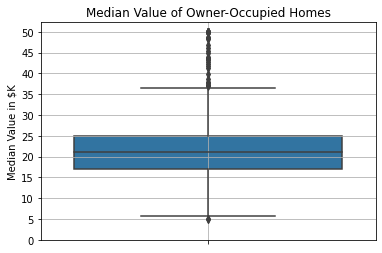

In [5]:
#MEDV
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title('Median Value of Owner-Occupied Homes') #Title
plt.ylabel('Median Value in $K') #Label
plt.yticks(np.arange(0, 51, step=5))
plt.grid() 
plt.show() 

Using **boxplot** with **boston_df.describe()**:
+ min ≃ 6,000
+ 25% = 17,0250
+ Median (50%) = 21,200
+ 75% = 25,000
+ max ≃ 36,500
+ There are more top outliers

## Provide a  histogram for the Charles river variable

In [6]:
boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

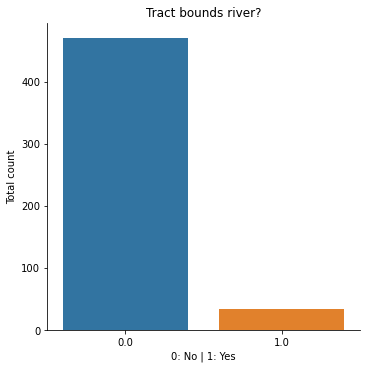

In [7]:
#CHAS
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title('Tract bounds river?') #Title
plt.ylabel('Total count') #Label
plt.xlabel('0: No | 1: Yes') #Label
plt.show() 

+ No tract bounds river = 471
+ Tract bounds river = 35

## Provide a boxplot for the MEDV variable vs the AGE variable.

In [8]:
#Discretize the age variable into three groups of 35 years and younger,
#between 35 and 70 years
#and 70 years and older
tempdf=boston_df.copy()
tempdf.loc[(tempdf['AGE'] <= 35), 'AGE_group'] = 'G1: Below Equals 35y'
tempdf.loc[(tempdf['AGE'] > 35) & (tempdf['AGE'] < 70), 'AGE_group'] = 'G2: Between 35~70y'
tempdf.loc[(tempdf['AGE'] >= 70), 'AGE_group'] = 'G3: Above Equals 70y'
tempdf=tempdf.sort_values(by=['AGE_group'])
tempdf

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group
252,252,0.08221,22.0,5.86,0.0,0.4310,6.957,6.8,8.9067,7.0,330.0,19.1,3.53,29.6,G1: Below Equals 35y
278,278,0.07978,40.0,6.41,0.0,0.4470,6.482,32.1,4.1403,4.0,254.0,17.6,7.19,29.1,G1: Below Equals 35y
279,279,0.21038,20.0,3.33,0.0,0.4429,6.812,32.2,4.1007,5.0,216.0,14.9,4.85,35.1,G1: Below Equals 35y
283,283,0.01501,90.0,1.21,1.0,0.4010,7.923,24.8,5.8850,1.0,198.0,13.6,3.16,50.0,G1: Below Equals 35y
284,284,0.00906,90.0,2.97,0.0,0.4000,7.088,20.8,7.3073,1.0,285.0,15.3,7.85,32.2,G1: Below Equals 35y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,114,0.14231,0.0,10.01,0.0,0.5470,6.254,84.2,2.2565,6.0,432.0,17.8,10.45,18.5,G3: Above Equals 70y
115,115,0.17134,0.0,10.01,0.0,0.5470,5.928,88.2,2.4631,6.0,432.0,17.8,15.76,18.3,G3: Above Equals 70y
116,116,0.13158,0.0,10.01,0.0,0.5470,6.176,72.5,2.7301,6.0,432.0,17.8,12.04,21.2,G3: Above Equals 70y
97,97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,4.21,38.7,G3: Above Equals 70y


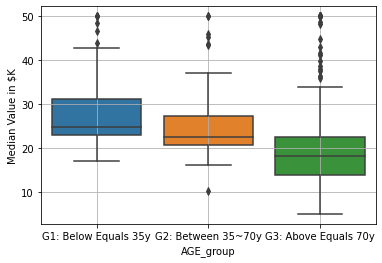

In [9]:
ax = sns.boxplot(x='AGE_group', y='MEDV', data=tempdf)
plt.grid()
plt.ylabel('Median Value in $K') #Label
plt.show() 

There is a behavior of the older the age, the lower the median value, as well as the maximum value.

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

In [10]:
#NOX and INDUS
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


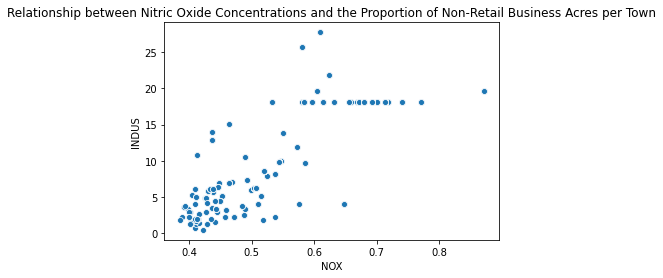

In [11]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Relationship between Nitric Oxide Concentrations and the Proportion of Non-Retail Business Acres per Town')
plt.show()

The lower the NOX, the lower the proportion of Non-Retail Business until 0.6.

After 0.6, the rate tends to remain constant.

## Create a histogram for the pupil to teacher ratio variable

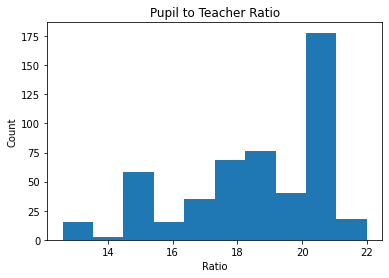

In [12]:
#PTRATIO
plt.hist(boston_df['PTRATIO'])
plt.title('Pupil to Teacher Ratio')
plt.ylabel('Count')
plt.xlabel('Ratio')
plt.show()

Most cities have a ration between 17 to 21 of pupil-teacher

# Task 5: Use the Appropriate Tests to Answer the Questions Provided.

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

LEVENE:

+ Null Hypothesis: Population variance is equal.

+ Alternative Hypothesis: Population variance is not equal.

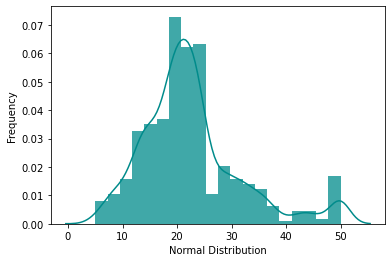

In [13]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='darkcyan',
                  hist_kws={"linewidth": 10,'alpha':0.75})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

In [14]:
#Test significance MEDV - CHAS
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

**pvalue (0.0032) < 0.05: Reject Null Hypothesis**

<span style="color: darkred;">(Population variance is not equal)</span>

So equal_var = False

TTEST:
+ Null Hypothesis: Equal Groups. There is not statistical difference.
+ Alternative Hypothesis: Different Groups. There is statistical difference.

In [15]:
#Welch's unequal variances t-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**pvalue (0.0035) < 0.05: Reject Null Hypothesis**

**>> There is statistical difference in median value of houses bounded by the Charles river.**

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

LEVENE:

+ Null Hypothesis: Population variance is equal.

+ Alternative Hypothesis: Population variance is not equal.

In [16]:
#Remember tempdf?
#tempdf.loc[(tempdf['AGE'] <= 35), 'AGE_group'] = 'G1: Below Equals 35y'
#tempdf.loc[(tempdf['AGE'] > 35) & (tempdf['AGE'] < 70), 'AGE_group'] = 'G2: Between 35~70y'
#tempdf.loc[(tempdf['AGE'] >= 70), 'AGE_group'] = 'G3: Above Equals 70y'

scipy.stats.levene(tempdf[tempdf['AGE_group'] == 'G1: Below Equals 35y']['MEDV'],
                   tempdf[tempdf['AGE_group'] == 'G2: Between 35~70y']['MEDV'], 
                   tempdf[tempdf['AGE_group'] == 'G3: Above Equals 70y']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748393, pvalue=0.06295337343259205)

**pvalue (0.063) > 0.050: Fail to reject Null Hypothesis**

<span style="color: darkgreen;">(Population variance is equal)</span>

So equal_var = True (Anyway...)

ANOVA:
+ Null Hypothesis: Equal Groups. There is not statistical difference.
+ Alternative Hypothesis: Different Groups. There is statistical difference at least between two groups.

In [17]:
G1 = tempdf[tempdf['AGE_group'] == 'G1: Below Equals 35y']['MEDV']
G2 = tempdf[tempdf['AGE_group'] == 'G2: Between 35~70y']['MEDV']
G3 = tempdf[tempdf['AGE_group'] == 'G3: Above Equals 70y']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(G1, G2, G3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


pvalue (0.000...) < 0.050: Reject Null Hypothesis

**>> There is statistical difference at least between two groups.**

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

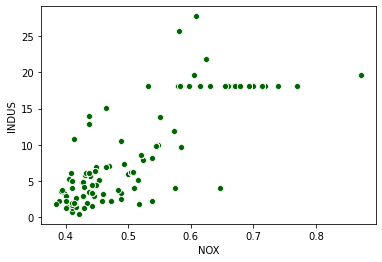

In [18]:
#NOX and INDUS
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df, color='darkgreen')

PEARSON CORRELATION TEST:

+ Null Hypothesis: NOX is not correlated with INDUS.

+ Alternative Hypothesis: NOX is correlated with INDUS.

In [19]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
#OMG

(0.763651446920915, 7.913361061239593e-98)

pvalue (0.000...) < 0.050: Reject Null Hypothesis

**>> No, we conclude that there is relationship between NOX and INDUS.**

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null Hypothesis: DIS has no impact on the MEDV
Alternative Hypothesis:: DIS has impact on the MEDV

In [20]:
#DIS and MEDV
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.21e-08
Time:                        20:44:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ p-value < 0.05: Reject Null Hypothesis
+ coef = 1.0916: DIS impact with 1.0916

**>> Additional weighted distance to the five Boston employment centres impacts the median value of owner occupied homes by increasing about 1.09.**

# Task 6: Share your Jupyter Notebook.

https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/81ceb526-f576-45a1-b2e4-53e0ed17ae46/view?access_token=50d1d93753109d9ea2b934f1baa69016ef1b8058019ae1b24fbb74d088820155